In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=5, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

# Gradient of the loss function
def gradient(true, pred):
    return -2 * (true - pred) / len(true)

In [9]:
# Initialize predictions with random values
predicted_gd = np.zeros_like(y_train)
predicted_sgd = np.zeros_like(y_train)
predicted_mini_batch = np.zeros_like(y_train)

In [15]:
# Loss function: Mean Squared Error (MSE)
def mse_loss(true, pred):
    return np.mean((true - pred) ** 2)


In [11]:
# Optimizers
learning_rate = 0.01
batch_size = 32

In [13]:
# To store losses for visualization
loss_gd = []
loss_sgd = []
loss_mini_batch = []


In [16]:
  # Stochastic Gradient Descent (SGD)
for i in range(len(y_train)):
    grad_sgd = gradient(y_train[i:i+1], predicted_sgd[i:i+1])
    predicted_sgd[i:i+1] -= learning_rate * grad_sgd
    loss_sgd.append(mse_loss(y_train, predicted_sgd))

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

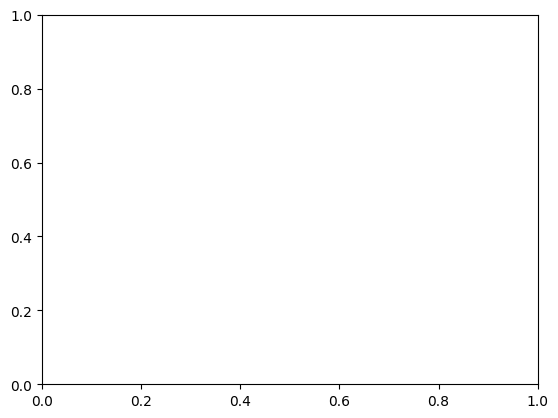

In [18]:
# Plot GD
plt.plot(range(100), loss_gd, label='Gradient Descent (GD)', marker='o')

ValueError: x and y must have same first dimension, but have shapes (800,) and (400,)

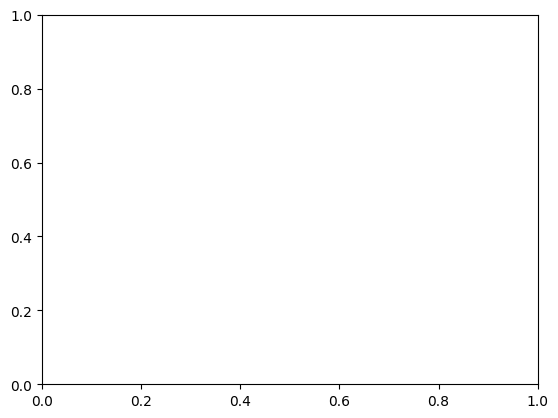

In [20]:
# Plot SGD
plt.plot(range(800), loss_sgd, label='Stochastic Gradient Descent (SGD)', marker='x')

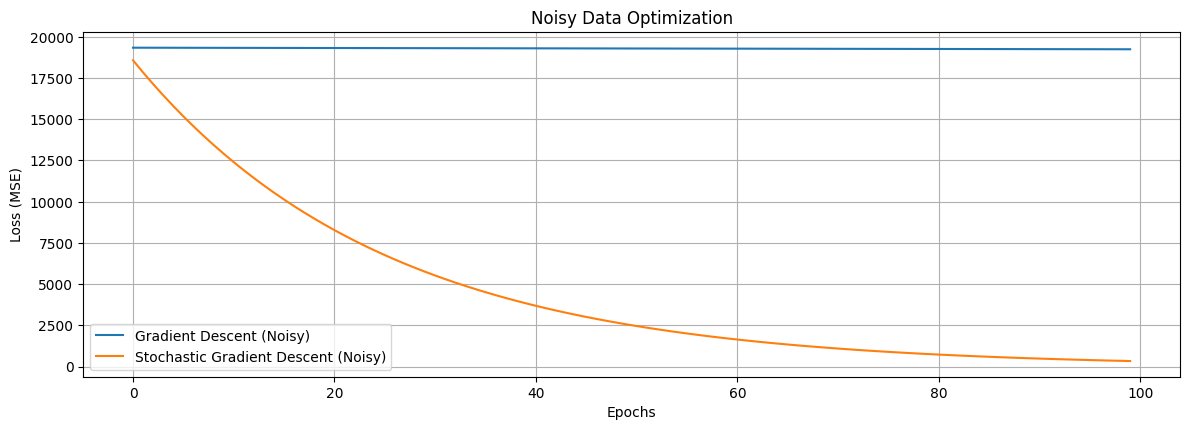

Final Losses (Non-Noisy):
Gradient Descent (GD): 17500.683372070056
Stochastic Gradient Descent (SGD): 309.34396340358995

Final Losses (Noisy):
Gradient Descent (GD): 19241.75779575721
Stochastic Gradient Descent (SGD): 340.1193823602896


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate additional noisy data
X_noisy, y_noisy = make_regression(n_samples=1000, n_features=10, noise=50, random_state=42)
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)

# Loss function: Mean Squared Error (MSE)
def mse_loss(true, pred):
    return np.mean((true - pred) ** 2)

# Gradient of the loss function
def gradient(true, pred):
    return -2 * (true - pred) / len(true)

# Optimizer parameters
learning_rate = 0.01
epochs = 100

# Initialize for GD and SGD
def initialize(y):
    return np.zeros_like(y), []

# Perform optimization
def optimize(true, pred, learning_rate, optimizer_type, batch_size=None):
    losses = []
    for epoch in range(epochs):
        if optimizer_type == "GD":
            grad = gradient(true, pred)
            pred -= learning_rate * grad
        elif optimizer_type == "SGD":
            for i in range(len(true)):
                grad = gradient(true[i:i+1], pred[i:i+1])
                pred[i:i+1] -= learning_rate * grad
        elif optimizer_type == "MiniBatch":
            for i in range(0, len(true), batch_size):
                batch_true = true[i:i+batch_size]
                batch_pred = pred[i:i+batch_size]
                grad = gradient(batch_true, batch_pred)
                pred[i:i+batch_size] -= learning_rate * grad
        losses.append(mse_loss(true, pred))
    return losses

# Noisy and Non-noisy optimization with GD and SGD
predicted_gd, loss_gd = initialize(y_train)
predicted_sgd, loss_sgd = initialize(y_train)

predicted_gd_noisy, loss_gd_noisy = initialize(y_train_noisy)
predicted_sgd_noisy, loss_sgd_noisy = initialize(y_train_noisy)

loss_gd = optimize(y_train, predicted_gd, learning_rate, "GD")
loss_sgd = optimize(y_train, predicted_sgd, learning_rate, "SGD")

loss_gd_noisy = optimize(y_train_noisy, predicted_gd_noisy, learning_rate, "GD")
loss_sgd_noisy = optimize(y_train_noisy, predicted_sgd_noisy, learning_rate, "SGD")

# Visualization
plt.figure(figsize=(12, 8))


# Plot noisy data
plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss_gd_noisy, label='Gradient Descent (Noisy)')
plt.plot(range(epochs), loss_sgd_noisy, label='Stochastic Gradient Descent (Noisy)')
plt.title('Noisy Data Optimization')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Display final losses
print("Final Losses (Non-Noisy):")
print("Gradient Descent (GD):", loss_gd[-1])
print("Stochastic Gradient Descent (SGD):", loss_sgd[-1])

print("\nFinal Losses (Noisy):")
print("Gradient Descent (GD):", loss_gd_noisy[-1])
print("Stochastic Gradient Descent (SGD):", loss_sgd_noisy[-1])


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [46]:
# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=10, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)

Random Forest Regression MSE: 3952.0583837275026


In [48]:
# Loss function: Mean Squared Error (MSE)
def mse_loss(true, pred):
    return np.mean((true - pred) ** 2)


In [49]:

# Gradient of the loss function
def gradient(true, pred):
    return -2 * (true - pred) / len(true)

In [50]:
# Optimizers
learning_rate = 0.01
batch_size = 32

In [51]:
# Initialize predictions with random values
predicted_gd = np.zeros_like(y_train)
predicted_sgd = np.zeros_like(y_train)
predicted_mini_batch = np.zeros_like(y_train)

In [52]:
# To store losses for visualization
loss_gd = []
loss_sgd = []
loss_mini_batch = []


In [53]:
# Perform optimization
for epoch in range(100):
    # Gradient Descent (GD)
    grad_gd = gradient(y_train, predicted_gd)
    predicted_gd -= learning_rate * grad_gd
    loss_gd.append(mse_loss(y_train, predicted_gd))

In [54]:
  # Stochastic Gradient Descent (SGD)
  for i in range(len(y_train)):
    grad_sgd = gradient(y_train[i:i+1], predicted_sgd[i:i+1])
    predicted_sgd[i:i+1] -= learning_rate * grad_sgd
    loss_sgd.append(mse_loss(y_train, predicted_sgd))

In [55]:
# Visualization of convergence
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

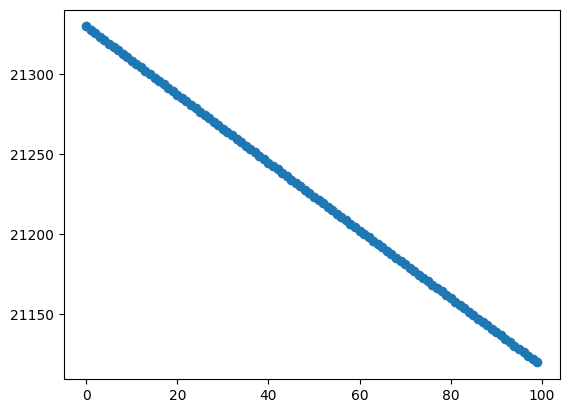

In [56]:
# Plot GD
plt.plot(range(100), loss_gd, label='Gradient Descent (GD)', marker='o')

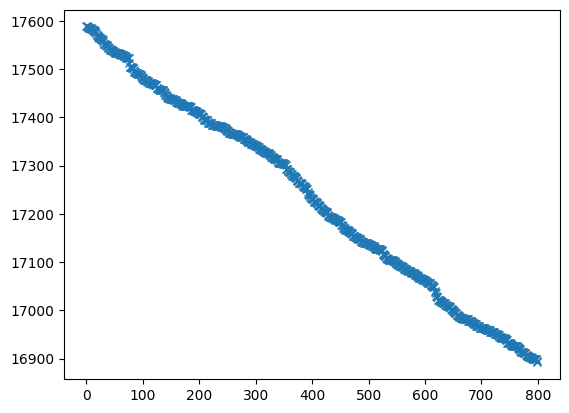

In [45]:
# Plot SGD
plt.plot(range(800), loss_sgd, label='Stochastic Gradient Descent (SGD)', marker='x')